In [56]:
import dask.dataframe as dd
import verde as vd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
from rasterio.transform import from_origin

In [57]:
gdf = gpd.read_file('NSWOEH/NSWOEH.shp')
df = gdf[['X', 'Y', 'Z']]

# Get the region/extent of the data from the coordinates
region = vd.get_region((df.X, df.Y))

In [82]:
def interpolate(spacing, df, interpolation, region):
    if (interpolation == "knn"):
        interpolator = vd.KNeighbors()
    elif (interpolation == "linear"):
        interpolator = vd.Linear()
    elif (interpolation == "cubic"):
        interpolator = vd.Cubic()

    interpolator.fit((df.X, df.Y), df.Z)   

    return interpolator.grid(region=region, spacing=spacing, data_names=['bathymetry'])

def export_to_tiff(tiff_name, crs, region, spacing, grid_bathymetry):
    # Export interpolated bathymetry to a GeoTIFF file
    meta = {
        "count": 1,
        "dtype": "float32",
        "height": grid_bathymetry.shape[0],
        "width": grid_bathymetry.shape[1],
        "transform": from_origin(
            region[0], region[3], spacing, spacing
        ),
        "crs": crs,
    }

    # Save the interpolated points to a GeoTIFF file
    with rio.open(f'{tiff_name}.tiff', "w", **meta) as dst:
        dst.write(np.flip(grid_bathymetry, 0), 1)

## KNeighbors

In [83]:
spacing = 50
grid = interpolate(spacing, df, 'knn', region)

In [85]:
# Get interpolation weights for the grid
grid_bathymetry = grid.bathymetry

Text(0.5, 1.0, 'KNN interpolation')

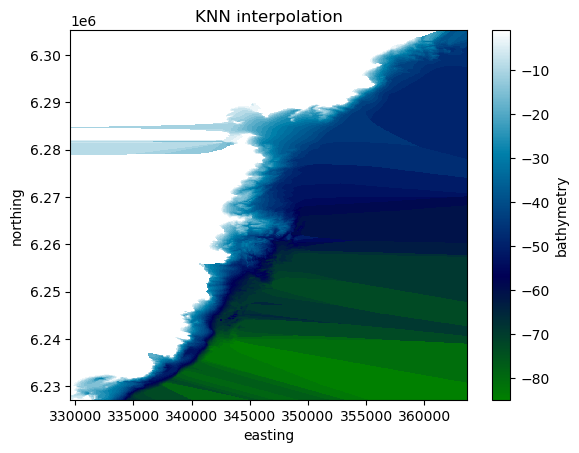

In [89]:
grid_bathymetry.plot(cmap='ocean')
plt.title('KNN interpolation')

In [43]:
export_to_tiff('knn', str(gdf.crs), region, spacing, grid_bathymetry)

## Cubic

In [90]:
spacing = 50
grid = interpolate(spacing, df, 'cubic', region)

In [91]:
# Get interpolation weights for the grid
grid_bathymetry = grid.bathymetry

Text(0.5, 1.0, 'CUBIC interpolation')

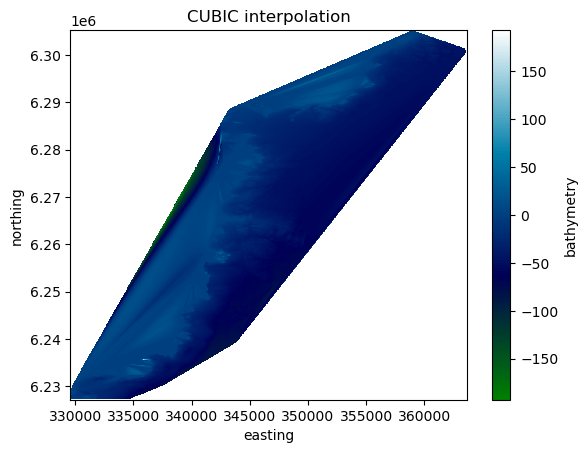

In [92]:
grid_bathymetry.plot.pcolormesh(cmap='ocean')
plt.title('CUBIC interpolation')

In [50]:
export_to_tiff('cubic', str(gdf.crs), region, spacing, grid_bathymetry)

## Linear

In [93]:
spacing = 50
grid = interpolate(spacing, df, 'linear', region)

In [94]:
# Get interpolation weights for the grid
grid_bathymetry = grid.bathymetry

Text(0.5, 1.0, 'LINEAR interpolation')

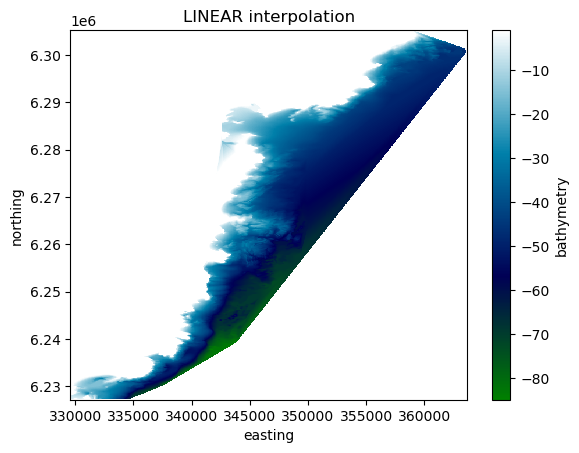

In [95]:
grid_bathymetry.plot.pcolormesh(cmap='ocean')
plt.title('LINEAR interpolation')

In [55]:
export_to_tiff('linear', str(gdf.crs), region, spacing, grid_bathymetry)